In [5]:
#!/usr/bin/env python
import os
import pandas as pd
import matplotlib as plt
from collections import defaultdict
# open all csv of schduler and get total average turnaround time of each scheduler, plot a chart, compare which one perform good

130.0


,id,priority,createdTime,startedTime,terminatedTime,cpuTime,blockedTime,turnaroundTime,waitingTime,responseTime
5,0,0,0,0,203,7,0,203,196,0
4,1,0,0,0,203,58,43,203,145,0
1,2,0,0,4,133,20,63,129,109,4
2,3,0,0,8,165,34,51,157,123,8
3,4,0,0,12,195,56,28,183,127,12
0,5,0,0,16,124,28,25,108,80,16


In [2]:
schedulers = ["FCFS","ISJF", "SJF", "RR"]
num_of_test_case = int(os.environ.get("TEST_CASES"))
total_average_TAT = defaultdict(list)
total_average_WT = defaultdict(list)
total_CPU_utilization = defaultdict(list)

for scheduler in schedulers:
    for i in range(1, num_of_test_case):
        file_path = f"experiment1/scheduler/{scheduler}/output/output{i}.out"
        df = pd.read_csv(file_path, sep="\t", header=0)
        average_TAT = round(df["turnaroundTime"].mean())
        average_WT = round(df["waitingTime"].mean())
        total_average_TAT[scheduler].append(average_TAT)
        total_average_WT[scheduler].append(average_WT)
        total_CPU_utilization[scheduler].append(df[df["id"] == 0]["cpuTime"].values[0])


defaultdict(<class 'list'>, {'FCFS': [110, 97, 90, 154, 45, 90, 29, 113, 20, 147], 'RR': [120, 113, 84, 186, 66, 101, 35, 125, 32, 149]})


<AxesSubplot:>

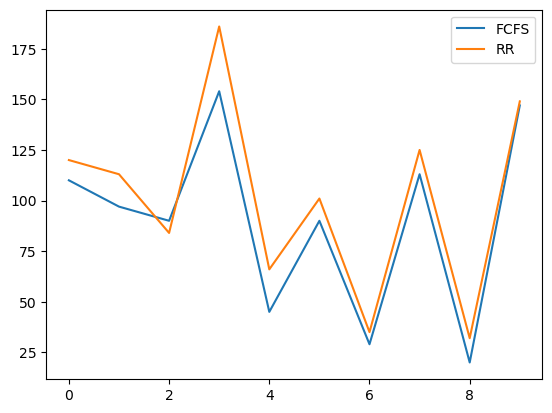

In [3]:
df = pd.DataFrame.from_dict(total_average_TAT)
df.plot()

<AxesSubplot:>

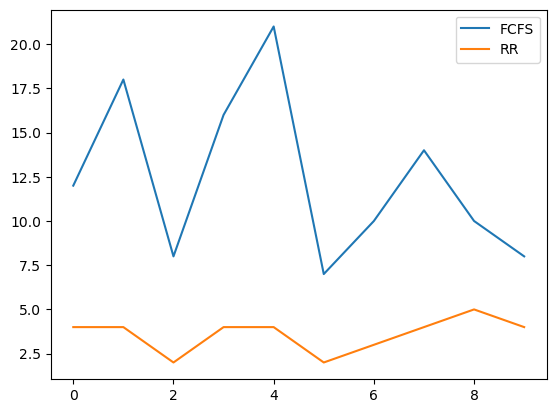

In [4]:
df = pd.DataFrame.from_dict(total_average_WT)
df.plot()

In [ ]:
print(total_CPU_utilization)

In [ ]:
df = pd.DataFrame.from_dict(total_CPU_utilization)
df.plot()